
# Кейс спринта


Заказчик проекта — «Карта ДТП». Это некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

«Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах. Заказчик хочет собирать данные более высокого качества и ожидает от вас рекомендаций: на какие проблемы или особенности обратить внимание.

## Что нужно сделать

Вам необходимо проверить, встречаются ли в данных дубликаты и пропуски. Это поможет заказчикам собирать более качественные данные.

Вам также понадобится ответить на следующие вопросы:

- как менялось число ДТП по временным промежуткам;

- различается ли число ДТП для групп водителей с разным стажем.


## Описание данных

Данные `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv` содержат информацию ДТП:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

*  `properties.tags` — тег происшествия;

*  `properties.light` — освещённость;

*  `properties.point.lat` — широта;

*  `properties.point.long` — долгота;

*  `properties.nearby` — ближайшие объекты;

*  `properties.region` — регион;

*  `properties.scheme` — схема ДТП;

*  `properties.address` — ближайший адрес;

*  `properties.weather` — погода;

*  `properties.category` — категория ДТП;

*  `properties.datetime` — дата и время ДТП;

*  `properties.injured_count` — число пострадавших;

*  `properties.parent_region` — область;

*  `properties.road_conditions` — состояние покрытия;

*  `properties.participants_count` — число участников;

*  `properties.participant_categories` — категории участников.

`Moscowskaya_oblast_participiants.csv`, `Kirovskaya_oblast_participiants.csv` — сведения об участниках ДТП:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после  ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.


`Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv` — сведения о транспортных средствах:

* `year` — год выпуска;

* `brand` — марка транспортного средства;

* `color` — цвет;

* `model` — модель;

* `category` — категория;

* `id` — идентификатор ДТП.

In [ ]:
import pandas as pd
df=pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')

# Проверка ошибок в данных и их предобработка



In [ ]:
df['properties.participants_count'].value_counts()

,count
properties.participants_count,
2,8611
3,2929
1,1533
4,909
5,353
6,109
7,44
8,9
9,9


### 1) Замена названий (меток) столбцов на оптимальные для работы

Для вывода названий столбцов можно использовать атрибут `columns`.

In [ ]:
df.columns

Index(['geometry.coordinates', 'id', 'properties.tags', 'properties.light',
       'properties.point.lat', 'properties.point.long', 'properties.nearby',
       'properties.region', 'properties.scheme', 'properties.address',
       'properties.weather', 'properties.category', 'properties.datetime',
       'properties.injured_count', 'properties.parent_region',
       'properties.road_conditions', 'properties.participants_count',
       'properties.participant_categories'],
      dtype='object')

В целом со столбцами конечно можно работать и в таком виде. Но `geometry.`, `properties.` — лишние части названий столбцов и от них можно избавиться.

In [ ]:
df = df.rename(columns={'geometry.coordinates': 'coordinates',
                        'properties.tags': 'tags',
                        'properties.light': 'light',
                        'properties.point.lat': 'point_lat'})

Использование `rename()` желательно, чтобы не запутаться в последовательности столбцов. Чтобы не прописывать все столбцы, можно заменить названия через `columns`. Так можно скопировать то, что получилось в выводе выше, и удалить лишнее. В ячейке ниже вариант реализации.

In [ ]:
df.columns = ['coordinates', 'id', 'tags', 'light',
       'point_lat', 'point_long', 'nearby',
       'region', 'scheme', 'address',
       'weather', 'category', 'datetime',
       'injured_count', 'parent_region',
       'road_conditions', 'participants_count',
       'participant_categories']


В ячейке ниже предлагается наиболее короткий вариант. Его не было в теории, но он здесь подходит: подстрока `properties.` встречается многократно, и от неё сразу везде можно избавиться.

In [ ]:
df.columns = [c.replace("properties.", "") for c in df.columns]


### 2) Проверка пропусков в данных

На примере датасета `Kirovskaya_oblast.csv` изучите, в каких столбцах есть пропуски. Предположите причины их возникновения. Напишите рекомендации, как работать с  пропусками и как их в дальнейшем избежать.

In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
scheme,1137
address,674
point_long,32
point_lat,32
id,0
coordinates,0
tags,0
light,0
region,0
nearby,0


Применение `isna().sum()` позволит ответить на этот вопрос. Если столбцов много, то их можно отсортировать по числу убывания пропусков и отфильтровать ненулевые значения.

После того как получили число пропусков по столбцам, нужно исследовать, что в этих столбцах располагается. Пройдёмся по порядку столбцов по убыванию числа пропусков.

В столбце `Scheme` множество численных обозначений для схемы конкретной аварии. Заполнить такой столбец сложно, но он и не нужен для исследования.

Стоит уточнить у заказчика, при каких ДТП схема может не заполняться и насколько этот столбец важен. Такие уточнения помогут сформулировать рекомендаций по сбору данных.

In [ ]:
df['scheme'].value_counts()

,count
scheme,
610.0,1051
300.0,1016
200.0,917
70.0,870
600.0,863
740.0,861
820.0,771
500.0,765
960.0,667


В столбце `address` довольно много пропусков. При рассмотрении строк с пропусками аномалий не наблюдается, возможно, адрес просто не указан.

In [ ]:
df[df['address'].isna()]

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
18,"[47.703667, 57.398549]",1981028,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",57.398549,47.703667,[],Яранский район,820.0,NaN,['Пасмурно'],Наезд на пешехода,2018-05-01 22:10:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
59,"[47.969474, 57.105731]",2875566,Дорожно-транспортные происшествия,Светлое время суток,57.105731,47.969474,[],Яранский район,950.0,NaN,['Ясно'],Опрокидывание,2023-08-13 16:20:00,1,Кировская область,['Сухое'],1,['Все участники']
63,"[47.891099, 57.309193]",2875597,Дорожно-транспортные происшествия,Светлое время суток,57.309193,47.891099,"['Многоквартирные жилые дома', 'Внутридворовая...",Яранский район,410.0,NaN,['Ясно'],Столкновение,2023-08-01 12:35:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
95,"[47.906871, 57.020891]",2861063,Дорожно-транспортные происшествия,Светлое время суток,57.020891,47.906871,[],Яранский район,600.0,NaN,['Пасмурно'],Съезд с дороги,2023-07-22 03:50:00,3,Кировская область,['Мокрое'],3,['Все участники']
130,"[47.828239, 57.298419]",1984517,Дорожно-транспортные происшествия,Светлое время суток,57.298419,47.828239,"['АЗС', 'Автостоянка (отделенная от проезжей ч...",Яранский район,830.0,NaN,['Ясно'],Наезд на пешехода,2020-06-25 08:50:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14489,"[51.079023, 56.227214]",1983961,Дорожно-транспортные происшествия,Светлое время суток,56.227214,51.079023,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,880.0,NaN,['Ясно'],Наезд на пешехода,2020-04-18 10:30:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
14497,"[51.293557, 56.251791]",1986098,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено",56.251791,51.293557,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,NaN,NaN,['Пасмурно'],Наезд на велосипедиста,2020-08-19 18:11:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Велосипедисты', 'Дети']"
14502,"[51.072639, 56.221047]",1986546,Дорожно-транспортные происшествия,Светлое время суток,56.221047,51.072639,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,880.0,NaN,['Ясно'],Наезд на пешехода,2019-09-03 11:20:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
14511,"[51.1186, 56.2417]",1980230,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",56.241700,51.118600,[],Вятско-Полянский район,NaN,NaN,['Ясно'],Наезд на препятствие,2018-07-02 19:25:00,1,Кировская область,"['Сухое', 'Дефекты покрытия']",1,"['Все участники', 'Мотоциклисты']"


Возникает вопрос, есть ли что-то необычное в авариях с пропусками адреса. Пропуск адреса может говорить о том, что рядом нет какого-либо объекта. Это сложно проверить наверняка, можно было бы нанести их на карту и посмотреть, отличаются ли чем-то аварии с пропуском в `address`, однако это решение потребует более сложных навыков.

В рамках текущего спринта можно обратиться к столбцу `nearby` за помощью — в нём лежат ближайшие объекты. Это не координаты, но для задачи подойдёт.



In [ ]:
df[df['address'].isna()]['nearby'].value_counts()

,count
nearby,
[],183
"['Многоквартирные жилые дома', 'Внутридворовая территория']",161
['Жилые дома индивидуальной застройки'],41
"['Многоквартирные жилые дома', 'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)', 'Внутридворовая территория']",20
['Многоквартирные жилые дома'],14
...,...
"['Производственное предприятие', 'Регулируемый ж/д переезд без дежурного']",1
"['Остановка общественного транспорта', 'Регулируемый пешеходный переход', 'Автостоянка (не отделённая от проезжей части)']",1
['Мост'],1


Не все значения пустые, а значит, гипотеза о том, что аварии с пропуском в `address` далеки от зданий, не подтверждается полностью. Похоже, этот столбец необязателен к заполнению.

Если вы хотите исследовать координаты, их можно округлить и посмотреть, есть ли «рядом» с авариями с незаполненным `address` строки с заполненным `address`. Можно округлить до тысячной градуса — получится точность примерно 100 метров, что довольно близко.

In [ ]:
df['point_lat'] = df['point_lat'].round(3)
df['point_long'] = df['point_long'].round(3)
lats = df[df['address'].isna()]['point_lat'].values
longs = df[df['address'].isna()]['point_long'].values
df.loc[(df['point_long'].isin(longs))& (df['point_lat'].isin(lats)) ].sort_values('point_lat')

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
14513,"[50.8911, 56.1978]",1985930,Дорожно-транспортные происшествия,Сумерки,56.198,50.891,[],Вятско-Полянский район,330.0,NaN,['Ясно'],Столкновение,2019-05-30 18:35:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Дети']"
14201,"[51.077574, 56.219943]",2766765,Дорожно-транспортные происшествия,Светлое время суток,56.220,51.078,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,880.0,NaN,['Пасмурно'],Наезд на пешехода,2022-10-31 12:45:00,1,Кировская область,['Мокрое'],2,"['Все участники', 'Пешеходы']"
14167,"[51.077929, 56.220307]",2693382,Дорожно-транспортные происшествия,Светлое время суток,56.220,51.078,"['Многоквартирные жилые дома', 'Выезд с прилег...",Вятско-Полянский район,130.0,"г Вятские Поляны, ул Гагарина, 32",['Ясно'],Столкновение,2022-06-15 18:35:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Мотоциклисты']"
14502,"[51.072639, 56.221047]",1986546,Дорожно-транспортные происшествия,Светлое время суток,56.221,51.073,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,880.0,NaN,['Ясно'],Наезд на пешехода,2019-09-03 11:20:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
14433,"[51.078808, 56.222747]",2553506,Дорожно-транспортные происшествия,Светлое время суток,56.223,51.079,"['Многоквартирные жилые дома', 'Административн...",Вятско-Полянский район,NaN,NaN,['Пасмурно'],Наезд на пешехода,2021-03-20 10:00:00,1,Кировская область,['Со снежным накатом'],2,"['Пешеходы', 'Все участники']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13912,"[None, None]",1987861,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,[],Кирово-Чепецки район,NaN,Киров - Кирово-Чепецк - Зуевка - Фаленки - Дем...,['Пасмурно'],Иной вид ДТП,2015-10-15 09:05:00,1,Кировская область,['Свежеуложенная поверхностная обработка'],2,['Все участники']
13914,"[None, None]",1987864,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",NaN,NaN,"['Многоквартирные жилые дома', 'Нерегулируемый...",Кирово-Чепецки район,820.0,"г Кирово-Чепецк, ул Алексея Некрасова, 35","['Пасмурно', 'Снегопад']",Наезд на пешехода,2015-10-09 17:52:00,1,Кировская область,['Заснеженное'],2,"['Все участники', 'Пешеходы']"
13970,"[None, None]",1987344,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,[],Кирово-Чепецки район,930.0,NaN,['Снегопад'],Наезд на препятствие,2016-01-09 14:00:00,1,Кировская область,['Заснеженное'],1,['Все участники']
13972,"[None, None]",1982271,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,"['Жилые дома индивидуальной застройки', 'Остан...",Кирово-Чепецки район,NaN,Киров - Кирово-Чепецк - Зуевка - Фаленки - Дем...,['Пасмурно'],Наезд на пешехода,2015-09-23 00:40:00,1,Кировская область,"['Сухое', 'Отсутствие освещения']",2,"['Все участники', 'Пешеходы']"


Пропусками в координатах гипотетически можно восстановить по адресам, но такой способ выходит за рамки задач начинающего аналитика. К тому же число пропусков координат невелико.


Можно дать совет заказчику сделать некоторые поля обязательными к заполнению. Например, координаты и схему, если это необходимо для последующего анализа.

In [ ]:
df[df['point_lat'].isna()].head()

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
391,"[None, None]",1985738,Дорожно-транспортные происшествия,Сумерки,NaN,NaN,[],Шабалинский район,NaN,"пгт Ленинское, ул Гагарина, 89",['Ясно'],Отбрасывание предмета,2015-05-25 22:00:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы', 'Дети']"
1029,"[None, None]",1986653,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,[],Свечинский район,610.0,Котельнич - Свеча - Ленинское - гр. Костромско...,['Пасмурно'],Съезд с дороги,2015-04-24 07:00:00,1,Кировская область,['Мокрое'],2,['Все участники']
2198,"[None, None]",1986337,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,['Жилые дома индивидуальной застройки'],Нолинский район,850.0,"с Кырчаны, ул Ленина, 10",['Пасмурно'],Наезд на пешехода,2016-09-05 20:10:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
2227,"[None, None]",1985083,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,[],Нолинский район,90.0,"Киров - Малмыж - Вятские Поляны, 110 км",['Пасмурно'],Столкновение,2016-06-12 20:50:00,2,Кировская область,"['Мокрое', 'Дефекты покрытия']",5,['Все участники']
2269,"[None, None]",1985078,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,['Жилые дома индивидуальной застройки'],Нолинский район,200.0,"д Среднее, ул Свободы, 72",['Ясно'],Наезд на велосипедиста,2016-06-23 13:50:00,1,Кировская область,['Сухое'],3,"['Все участники', 'Велосипедисты', 'Дети']"


### 3) Наличие явных и неявных дубликатов в данных



Есть ли явные дубликаты в данных, какой это процент значений?

In [ ]:
df.duplicated().sum()

np.int64(0)

Дубликатов не оказалось. Хорошая практика дополнительно смотреть число неявных дубликатов и то, являются ли уникальные идентификаторы уникальными.

In [ ]:
df[df.duplicated(subset=['point_lat', 'point_long', 'datetime'])]

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories


Комбинация координат и даты со временем кажется довольно уникальной, и ДТП с совпадающими координатами и временем не оказалось.

In [ ]:
df['id'].nunique() == df['id'].count()

np.True_

Число уникальных идентификаторов равно общему числу идентификаторов, что говорит о том, что каждый из них — уникален.

### 4) Проверка корректности типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coordinates             14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point_lat               14485 non-null  float64
 5   point_long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

In [ ]:
df.columns

Index(['coordinates', 'id', 'tags', 'light', 'point_lat', 'point_long',
       'nearby', 'region', 'scheme', 'address', 'weather', 'category',
       'datetime', 'injured_count', 'parent_region', 'road_conditions',
       'participants_count', 'participant_categories'],
      dtype='object')

In [ ]:
df.head()

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.244,47.876,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.305,47.879,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297,47.841,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.245,47.834,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.358,47.968,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


* В `coordinates` располагается пара значений. С ней неудобно взаимодействовать, к тому же отдельно существуют столбцы `point_lat`, `point_long`, которые более самодостаточны. Можно дать рекомендацию избавиться от `coordinates`.
* Для столбца `id` достаточно `int32`, что сэкономит место.
* Для `participants_count`, `injured_count` достаточно `int8`.
* Для `scheme` — `int16`. Нужно заменить пропуски заглушкой и округлить значения (десятичная часть в этом случае не несёт никакой смысловой нагрузки).
* Есть ряд столбцов  (`nearby`, `weather`,`road_conditions`, `participant_categories`), в которых есть списки. С ними неудобно работать, но в рамках задания это делать не придётся. Оставляем тип `object`.
* Строковые столбцы (`tags`, `light`,  `region`,  `address`,`category`, `parent_region`) можно оставить в текущем виде, потому что в них действительно располагаются строки.

In [ ]:
df.head()

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.244,47.876,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.305,47.879,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297,47.841,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.245,47.834,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.358,47.968,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


## Исследовательский анализ



### Какое число ДТП случилось в каждый день недели. Разбивка числа происшествий по месяцам

Импортируем библиотеку и добавляем необходимые столбцы.

In [ ]:
import datetime as dt

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['day_of_week'] = df['datetime'].dt.day_name()

In [ ]:
df['month'] = df['datetime'].dt.month

Выводим число ДТП по дням недели и месяцам.

In [ ]:
df['day_of_week'].value_counts()

,count
day_of_week,
Friday,2344
Saturday,2246
Sunday,2054
Monday,2010
Tuesday,1988
Wednesday,1939
Thursday,1936


In [ ]:
df['month'].value_counts()

,count
month,
8,1654
7,1635
6,1421
9,1370
10,1333
11,1200
5,1189
12,1164
1,1069


Летние месяцы неожиданно лидируют по числу аварий. Потеря бдительности с пятницы до понедельника более предсказуема. Хорошо также проверить, сохраняется ли такая тенденция на большем числе данных в других городах, так как число ДТП в понедельник и вторник уже не так различается.

### Категории водителей по стажу. Есть ли категории, которые разительно отличаются по числу ДТП

Здесь понадобится другой датафрейм.

In [ ]:
df_partipiants = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')

In [ ]:
df_partipiants.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


Не для всех водителей заполнен столбец стажа. Это будет отдельной категорией, вдруг это водители, у которых было прав.

In [ ]:
df_partipiants.loc[df_partipiants['role'] == "Водитель"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19753 entries, 0 to 31232
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         19753 non-null  object 
 1   gender                       19018 non-null  object 
 2   violations                   19753 non-null  object 
 3   health_status                19661 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           19753 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


Можно также выделить категории по десятелетиям опыта.

In [ ]:
df_partipiants['category_exp'] = pd.cut(df_partipiants['years_of_driving_experience'], [0,10,20,30,40,50,60,70])


In [ ]:
df_partipiants['category_exp'].value_counts()

,count
category_exp,
"(0, 10]",6771
"(10, 20]",5049
"(20, 30]",2724
"(30, 40]",1618
"(40, 50]",629
"(50, 60]",106
"(60, 70]",12


Значительно уменьшается количество аварий у водителей с 20-летним стажем. Можно воспользоваться промежутками поменьше, например 5 лет.

In [ ]:
df_partipiants['category_exp_extra'] = pd.cut(df_partipiants['years_of_driving_experience'], [0,5,10,15,20,25,30,35,40,50,60,70])


In [ ]:
df_partipiants['category_exp_extra'].value_counts()

,count
category_exp_extra,
"(0, 5]",3533
"(5, 10]",3238
"(10, 15]",2769
"(15, 20]",2280
"(20, 25]",1587
"(25, 30]",1137
"(30, 35]",921
"(35, 40]",697
"(40, 50]",629


Видно уменьшение числа аварий в зависимости от опыта. Важно учитывать, какое число водителей есть в каждой когорте, однако таких сведений у нас нет. Можно только сказать, что тех, у кого стаж составляет 60–70 лет, наверняка меньшинство.

Рекомендации заказчику: сделать столбец со стажем обязательным для заполнения. В нём 2844 пропусков — 14% от общего числа. Тех, у кого не было прав, можно фиксировать отдельно. Вероятно, что причина отсутствия прав также важна: их забрали или водитель их не получил.

### Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена). Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей

Сначала совершим технические приготовления и добавим необходимые дополнительные столбцы.

In [ ]:
df['year'] = df['datetime'].dt.year

In [ ]:
df_moscow=pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')

In [ ]:
df_moscow = df_moscow.rename(columns={'properties.datetime': 'datetime'})

df_moscow['datetime'] = pd.to_datetime(df_moscow['datetime'])

In [ ]:
df_moscow['year'] = df_moscow['datetime'].dt.year

Добавим вручную значения численности населения по этим двум областям и сделаем это сразу в сотнях тысяч. Мы использовали сведения из Википедии, хотя можно использовать и другие источники. После этого разделим число аварий на численность областей и получим информацию о числе аварий на сто тысяч населения.

In [ ]:
df_dtp_on_years = df['year'].value_counts().sort_index().to_frame()
df_dtp_on_years['population'] = [13, 13, 13, 13, 13, 13, 12, 11, 11, 11]
df_dtp_on_years['dtp_on_100k'] = round(df_dtp_on_years['count'] / df_dtp_on_years['population'], 2)
df_dtp_on_years

,count,population,dtp_on_100k
year,,,
2015,1532,13,117.85
2016,1468,13,112.92
2017,1452,13,111.69
2018,1612,13,124.00
2019,1568,13,120.62
2020,1498,13,115.23
2021,1524,12,127.00
2022,1386,11,126.00
2023,1486,11,135.09


In [ ]:
df_moscow_dtp_on_years = df_moscow['year'].value_counts().sort_index().to_frame()
df_moscow_dtp_on_years['population'] = [72, 73, 74, 75, 76, 77, 85, 85, 86, 87]
df_moscow_dtp_on_years['dtp_on_100k'] = round(df_moscow_dtp_on_years['count'] / df_moscow_dtp_on_years['population'], 2)
df_moscow_dtp_on_years

,count,population,dtp_on_100k
year,,,
2015,6643,72,92.26
2016,5794,73,79.37
2017,5747,74,77.66
2018,5102,75,68.03
2019,5111,76,67.25
2020,4216,77,54.75
2021,3898,85,45.86
2022,3353,85,39.45
2023,3372,86,39.21


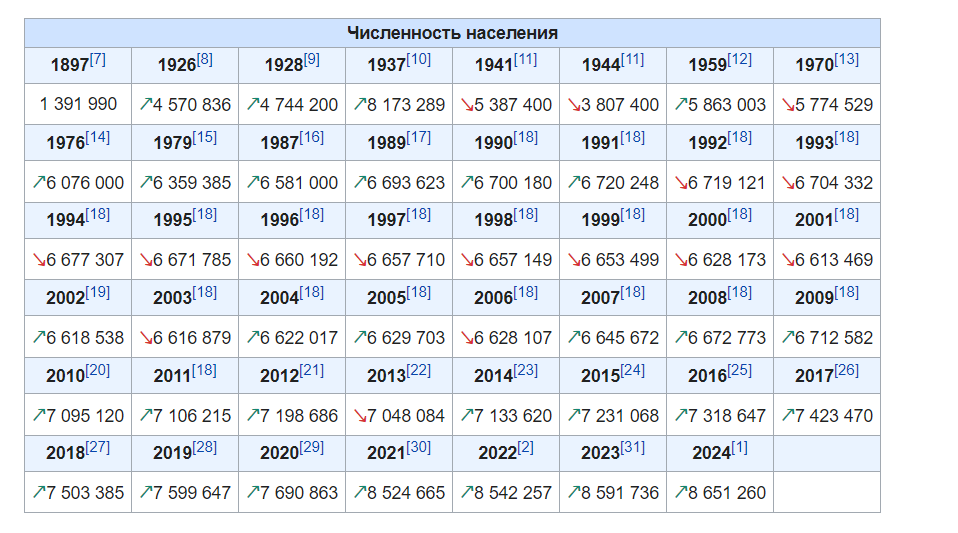

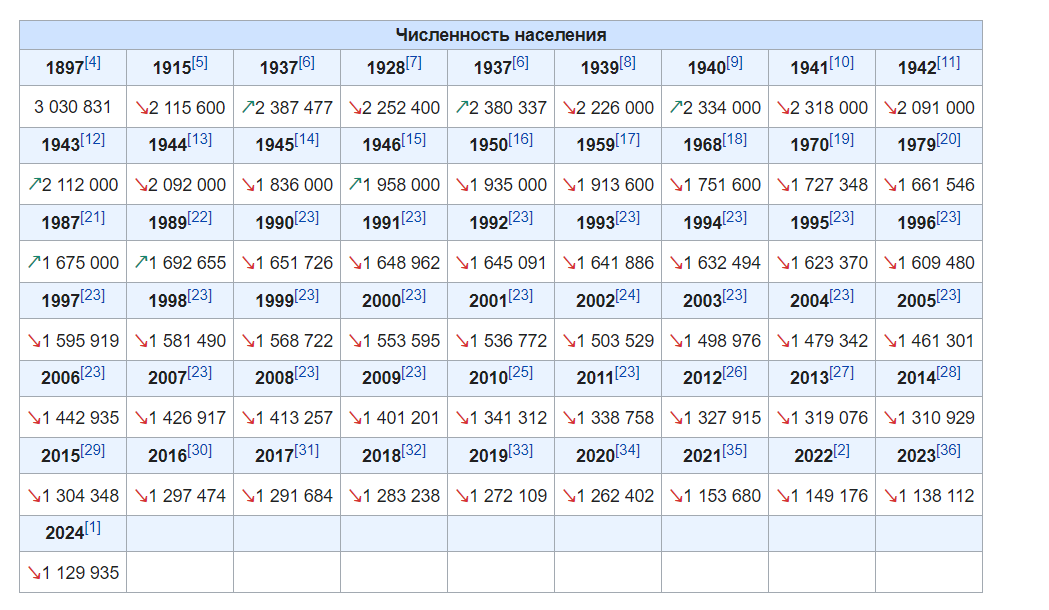

# Итоговые выводы

Рекомендации заказчику:
* Использовать названия столбцов без `properties.`.
* Сделать обязательным заполнение столбцов координат (а именно `point_long`, `point_lat`, потому что от столбца `coordinates` избавились) и схемы, если это необходимо. Выяснить причины, почему некоторые адреса не заполнены. Если этот столбец важен, сделать его заполнение обязательным.
* Дубликатов не обнаружено, идентификаторы аварий уникальны.
* Форматы данных неоптимальны, можно использовать типы данных, которые занимают меньше места для экономии.

Выводы:
* Аварий в летние месяцы ощутимо больше. По дням недели есть некоторая тенденция большего числа ДТП, но стоит уточнить, имеется ли такая динамика на большем числе данных.
* С ростом стажа аварий становится меньше, но важно также учитывать, сколько водителей в каждой категории по стажу.